# 0.0 Imports

In [38]:
import pandas as pd
import math
import cv2
from watermark import watermark 
import os

from sklearn import datasets as dt
from sklearn import tree     as tr
from matplotlib import pyplot as plt
import numpy as np

In [2]:
print( watermark( packages = 'numpy' ) )

numpy: 1.19.5



# 1.0 Read File

In [3]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 1.0 Species únicas

In [4]:
# ver valores unicos
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
# classes estão balanceadas
df[['species']].value_counts()

species        
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## 1.1 Fazendo o primeiro nó da árvore

In [6]:
# petal length <= 2.45
df_petal_length_true = df.loc[ df['petal_length'] <= 2.45 , : ]
df_petal_length_false = df.loc[~( df['petal_length'] <= 2.45 ) , : ]

In [7]:
print( 'Petal length com petala <= 2.45 \n {} :'.format( df_petal_length_true['species'].value_counts() ) )

print('='*50)

print( 'Petal length com petala >= 2.45 \n {} :'.format( df_petal_length_false['species'].value_counts() ) )

Petal length com petala <= 2.45 
 Iris-setosa    50
Name: species, dtype: int64 :
Petal length com petala >= 2.45 
 Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64 :


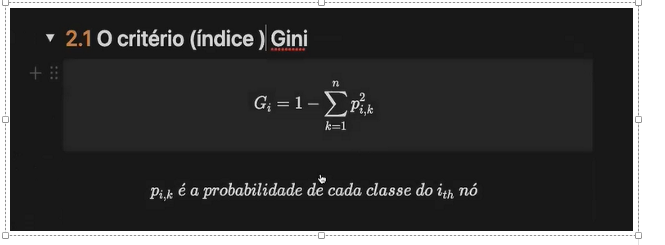

In [8]:
classe1 = (50/50)**2
classe2 = (0/50)**2
classe3 = (0/50)**2

In [9]:
g1 = 1-(classe1 + classe2 + classe3) 
g1

0.0

In [10]:
# df resultante
df1 = df_petal_length_false

## 1.2 Fazendo o segundo nó na árvore

In [11]:
## 1.2 Fazendo o segundo nó na árvore
df_no2_true = df1.loc[df1['petal_width'] <= 1.75, :]
df_no2_false = df1.loc[~(df1['petal_width'] <= 1.75), :]

In [12]:
print( 'Nó 1 petal_width com petala <= 1.75 \n {} :'.format( df_no2_true['species'].value_counts() ) )

print('='*50)

print( 'Nó 2 petal_width com petala >= 1.75 \n {} :'.format( df_no2_false['species'].value_counts() ) )

Nó 1 petal_width com petala <= 1.75 
 Iris-versicolor    49
Iris-virginica      5
Name: species, dtype: int64 :
Nó 2 petal_width com petala >= 1.75 
 Iris-virginica     45
Iris-versicolor     1
Name: species, dtype: int64 :


In [13]:
# gini para o nó 1
total_classe = 49 + 5 + 0
classe1 = (49/total_classe)**2
classe2 = (5/total_classe)**2
classe3 = (0/total_classe)**2

In [14]:
g2 = ( 1- ( classe1 + classe2 + classe3  ) ) *100
print( 'O nó 1  tem {:,.1f} % de impureza'.format( g2 ) )

O nó 1  tem 16.8 % de impureza


# 2.0 Entropia

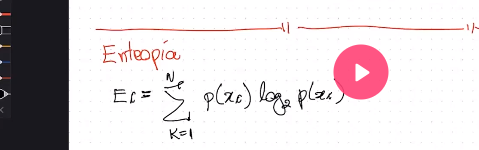

In [15]:
t_classe = 49 + 5 + 0
classe1 = ( 49/t_classe )
classe2 = ( 5/t_classe )
classe3 = ( 0/t_classe )

In [16]:
E3 = (classe1 * math.log(classe1, 2)) + (classe2 * math.log(classe2, 2))
E3

-0.44506485705083865

# 3.0. Decision Tree na Prática

In [17]:
iris = dt.load_iris()

In [18]:
X = iris.data[:, 2:]
y = iris.target

In [19]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [27]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [41]:
# instance

# max_depth limita o crescimento da arvore
# min_sample_leaf : número mínimo de amostras que a folha deve ter antes de fazer uma separação e gerar nós filhos
dt_model = tr.DecisionTreeClassifier(max_depth=10, min_samples_split=30)

# training
dt_model.fit(X, y)

# predict
dt_model.predict_proba( X ) # deu assim porque estou prevendo sobre os dados de treino

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.

In [33]:
# exportar a arvore de decisão
tr.export_graphviz(dt_model,
                   out_file='tree.dot',
                   feature_names=iris.feature_names[2:],
                   class_names=iris.target_names,
                   rounded=True,
                   filled=True)

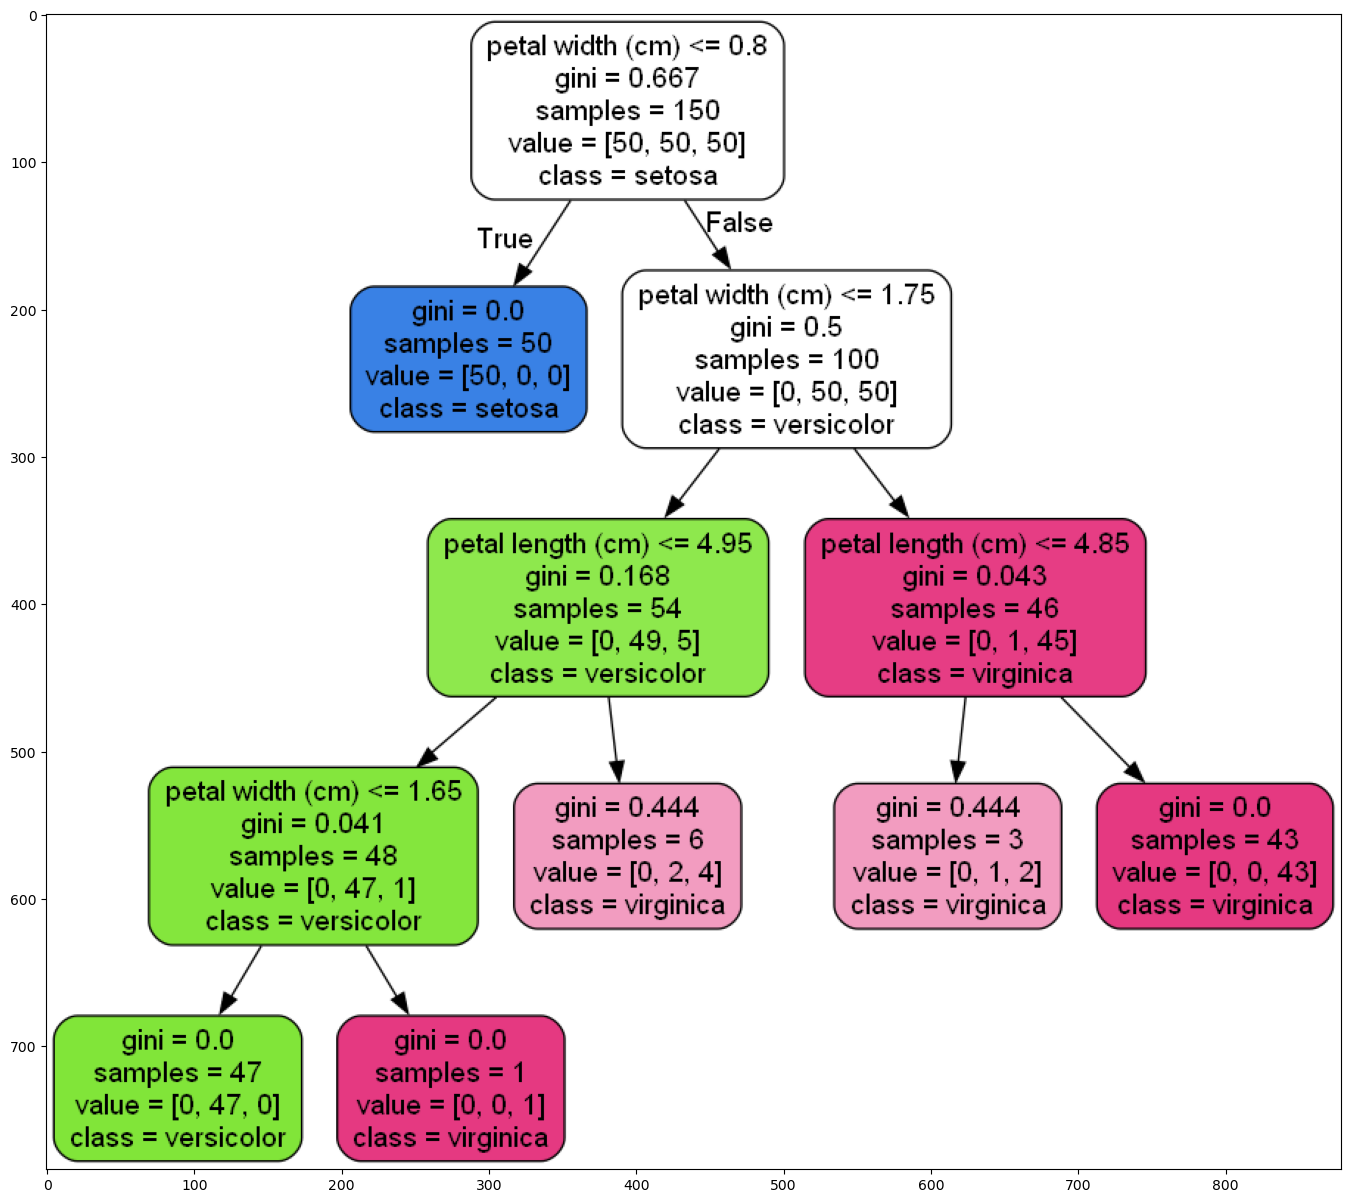

In [34]:
img = cv2.imread('tree.png')
plt.figure(figsize=(20, 15))
plt.imshow(img)